<a href="https://colab.research.google.com/github/lukassso/python-mini-projects/blob/master/cancer_PPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Image

In [ ]:
print(np.__version__)
print(pd.__version__)
print(tf.__version__)
print(tf.keras.__version__)

2.0.2
2.2.2
2.18.0
3.8.0


In [ ]:
df = pd.read_csv('cancer.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
y = df['diagnosis']
X = df.drop(columns=['id', 'diagnosis'])
X.shape

(569, 30)

In [ ]:
y.value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X_std = sc.fit_transform(X).astype('float32')
le = LabelEncoder()
y = le.fit_transform(y)
np.unique(y)

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
model = Sequential()
model.add(Input((30, )))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 100)                 │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,201 (32.04 KB)

 Trainable params: 8,201 (32.04 KB)

 Non-trainable params: 0 (0.00 B)

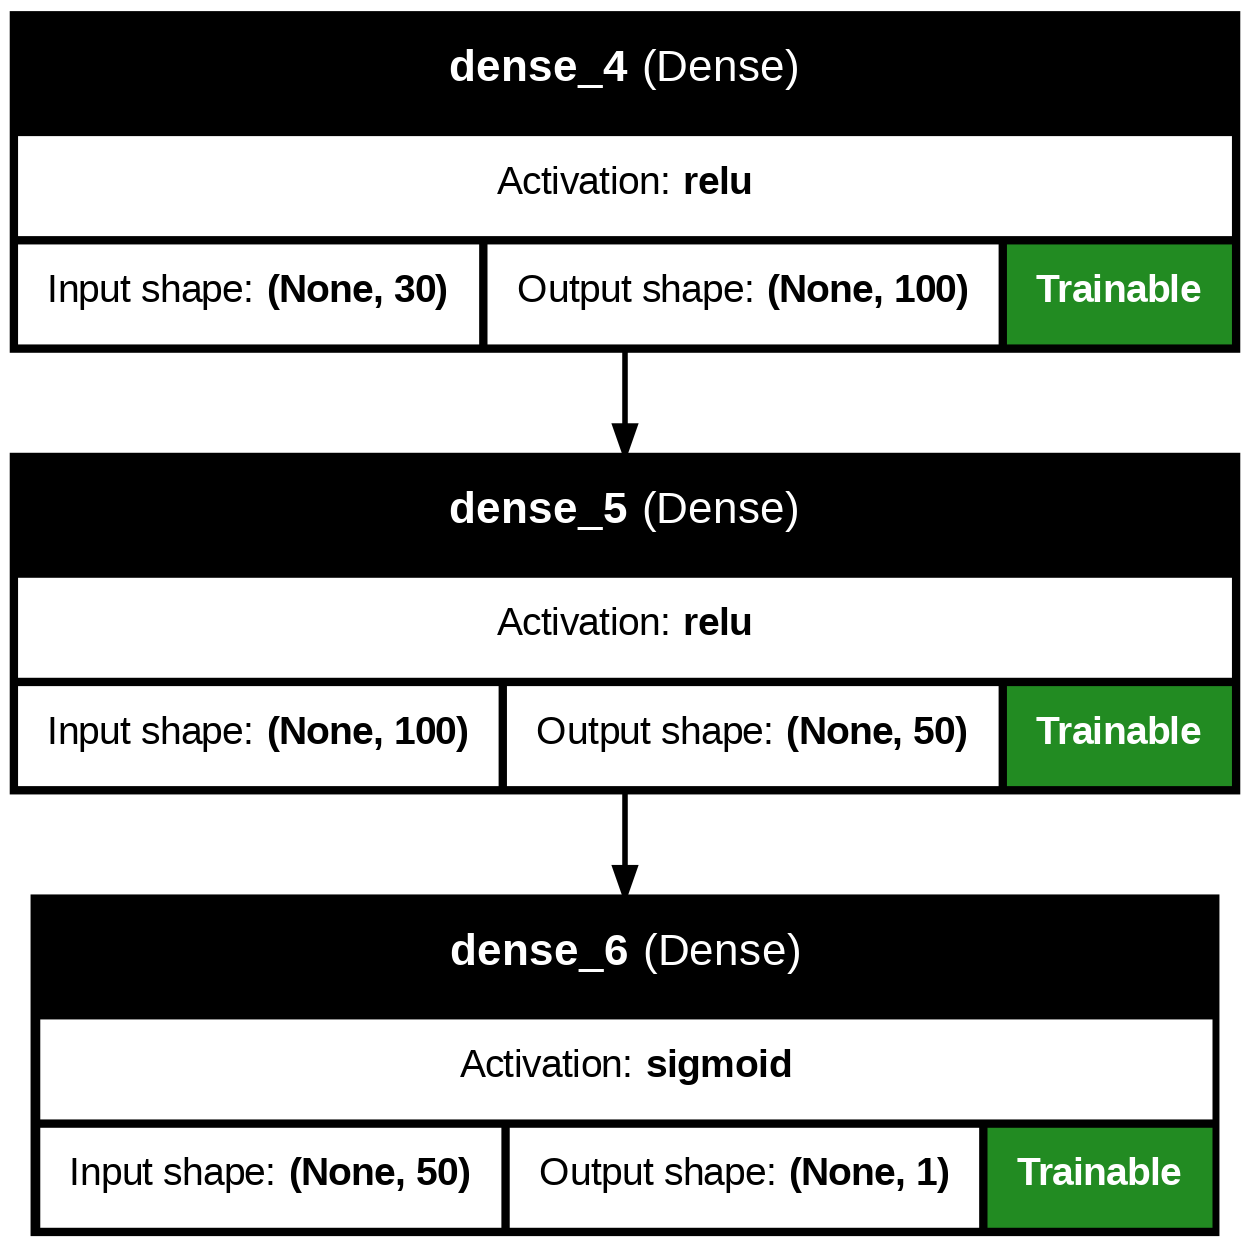

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          show_layer_activations=True,
                          show_trainable=True)
Image(filename='model.png', width=480)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
fit = model.fit(X_train, y_train, epochs=20,
                validation_data=(X_test, y_test))

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6322 - loss: 0.6404 - val_accuracy: 0.9301 - val_loss: 0.3350
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9411 - loss: 0.2941 - val_accuracy: 0.9441 - val_loss: 0.1823
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9487 - loss: 0.1716 - val_accuracy: 0.9510 - val_loss: 0.1247
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9349 - loss: 0.1501 - val_accuracy: 0.9580 - val_loss: 0.0952
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9707 - loss: 0.0984 - val_accuracy: 0.9650 - val_loss: 0.0789
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9849 - loss: 0.0831 - val_accuracy: 0.9720 - val_loss: 0.0688
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9851 - loss: 0.0664 - val_accuracy: 0.9790 - val_loss: 0.0635
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9910 - loss: 0.0589 - val_accuracy: 0.9790 - val_los

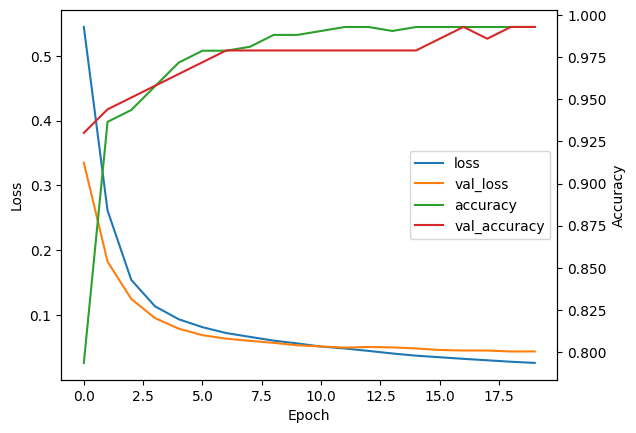

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
l1, = ax1.plot(fit.history['loss'], '-', color='C0', label='loss')
l2, = ax1.plot(fit.history['val_loss'], '-', color='C1', label='val_loss')
l3, = ax2.plot(fit.history['accuracy'], '-', color='C2', label='accuracy')
l4, = ax2.plot(fit.history['val_accuracy'], '-', color='C3', label='val_accuracy')
ax1.set_xlabel("Epoch")
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
plt.legend(handles=[l1, l2, l3, l4], loc='center right');

In [ ]:
fit = model.fit(X_train, y_train, epochs=20,
                validation_data=(X_test, y_test))

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9876 - loss: 0.0323 - val_accuracy: 0.9930 - val_loss: 0.0452
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9943 - loss: 0.0262 - val_accuracy: 0.9930 - val_loss: 0.0451
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9924 - loss: 0.0257 - val_accuracy: 0.9930 - val_loss: 0.0438
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9973 - loss: 0.0149 - val_accuracy: 0.9930 - val_loss: 0.0437
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9981 - loss: 0.0153 - val_accuracy: 0.9930 - val_loss: 0.0440
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9966 - loss: 0.0156 - val_accuracy: 0.9930 - val_loss: 0.0445
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9936 - loss: 0.0183 - val_accuracy: 0.9930 - val_loss: 0.0427
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9962 - loss: 0.0185 - val_accuracy: 0.9930 - val_loss:

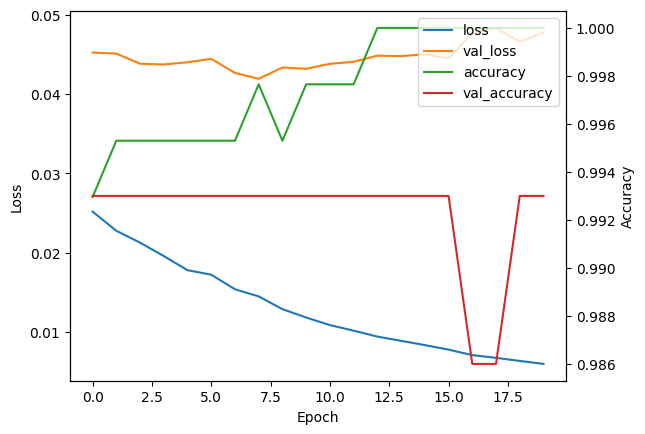

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
l1, = ax1.plot(fit.history['loss'], '-', color='C0', label='loss')
l2, = ax1.plot(fit.history['val_loss'], '-', color='C1', label='val_loss')
l3, = ax2.plot(fit.history['accuracy'], '-', color='C2', label='accuracy')
l4, = ax2.plot(fit.history['val_accuracy'], '-', color='C3', label='val_accuracy')
ax1.set_xlabel("Epoch")
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
plt.legend(handles=[l1, l2, l3, l4], loc='upper right');

In [ ]:
fit = model.fit(X_train, y_train, epochs=20,
                validation_data=(X_test, y_test))

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9860 - val_loss: 0.0487
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9860 - val_loss: 0.0489
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9860 - val_loss: 0.0498
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9860 - val_loss: 0.0508
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.9860 - val_loss: 0.0514
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9860 - val_loss: 0.0528
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9860 - val_loss: 0.0520
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.9860 - val_lo

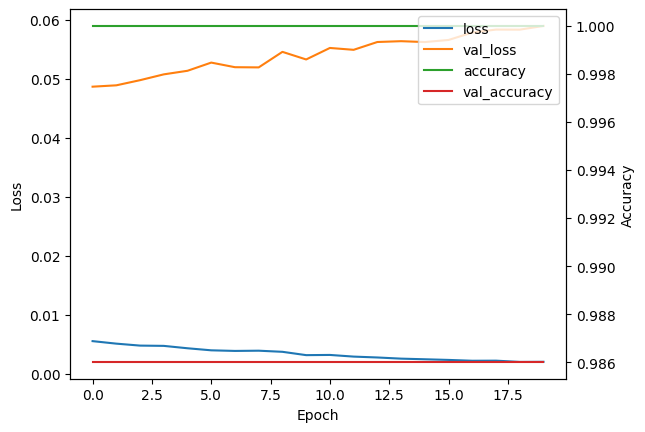

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
l1, = ax1.plot(fit.history['loss'], '-', color='C0', label='loss')
l2, = ax1.plot(fit.history['val_loss'], '-', color='C1', label='val_loss')
l3, = ax2.plot(fit.history['accuracy'], '-', color='C2', label='accuracy')
l4, = ax2.plot(fit.history['val_accuracy'], '-', color='C3', label='val_accuracy')
ax1.set_xlabel("Epoch")
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
plt.legend(handles=[l1, l2, l3, l4], loc='upper right');

In [ ]:
model.evaluate(X_train, y_train)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0017


[0.0018216108437627554, 1.0]

In [ ]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9788 - loss: 0.0736 


[0.05897865444421768, 0.9860140085220337]

In [ ]:
y_test_pred = model.predict(X_test).ravel()

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
y_test_pred.shape

(143,)